**Tech-Challenge**

**Problemas de Negócios** 

O objetivo é identificar quais são os melhores indicadores para prever os custos médicos individuais cobrados pelo seguro de saúde.

**Base de Dados**

Este conjunto de dados consiste nas seguintes características: idade, sexo, IMC, fumante, região e custo médico. 

**Desafio**

Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

In [137]:
# ! pip install pandas

import pandas as pd
# Carregamento dos dados
dados = pd.read_csv("C:\\custos_medicos.csv.csv")
dados.head(10)

,idade,sexo,imc,filhos,fumante,região,custos_médicos
0,56,feminino,38.490198,4,sim,oeste,23999.019819
1,69,masculino,30.341074,2,não,sudoeste,13084.107421
2,46,masculino,38.648331,0,não,sul,10414.833078
3,32,feminino,29.102585,2,não,oeste,9660.258545
4,60,masculino,19.468496,1,sim,norte,20896.849641
5,25,masculino,22.753951,4,não,sudeste,9175.395124
6,38,masculino,26.055136,0,não,nordeste,8755.513602
7,56,feminino,38.658304,0,sim,noroeste,21715.830408
8,36,masculino,34.825237,3,não,nordeste,10932.523710
9,40,masculino,31.435128,1,não,sudoeste,9793.512764


In [92]:
dados.shape

(100000, 7)

In [113]:
set(dados.smoker)

{'no', 'yes'}

**Interferência sobre a base de dados:**

Variável Target: No nosso case a target é a coluna fumante.

**Analisando os dados**

In [94]:
# Estatísticas descritivas
dados.describe()
# int, float    

,idade,imc,filhos,custos_medicos
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,46.033670,29.268627,2.495820,16133.446689
std,16.433943,6.209564,1.707733,5377.966207
min,18.000000,18.500103,0.000000,5660.596020
25%,32.000000,23.875898,1.000000,11109.342839
50%,46.000000,29.273843,2.000000,16611.062819
75%,60.000000,34.629879,4.000000,21127.256892
max,74.000000,39.999772,5.000000,26493.884128


In [95]:
# Análise descritiva
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   idade           100000 non-null  int64  
 1   sexo            100000 non-null  object 
 2   imc             100000 non-null  float64
 3   filhos          100000 non-null  int64  
 4   fumante         100000 non-null  object 
 5   região          100000 non-null  object 
 6   custos_medicos  100000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.3+ MB


Analisando as váriavies númericas:

In [96]:
# ! pip install seaborn
import seaborn as sb

Analisando as variáveis numéricas:

Vamos analisar e compreender a distribuição dos dados para cada métrica de pontuação de seguro de saude. Será que temos outliers na base?

<Axes: xlabel='age'>

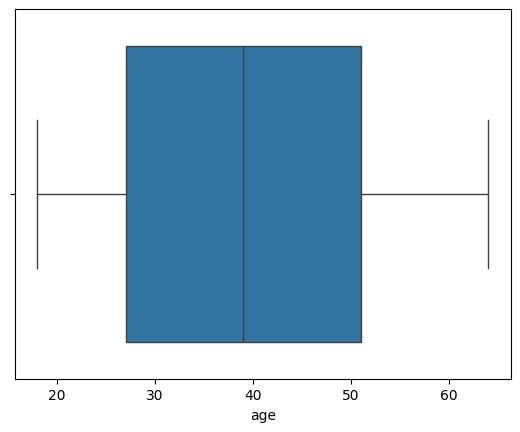

In [114]:
sb.boxplot(x=dados["age"])

In [122]:
print(dados['age'].min())
print(dados['age'].max())

18
64


<Axes: xlabel='age', ylabel='Count'>

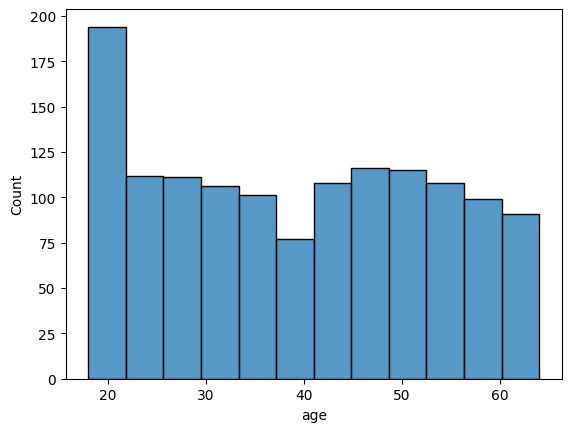

In [115]:
sb.histplot(data=dados, x="age")

<Axes: xlabel='bmi', ylabel='Count'>

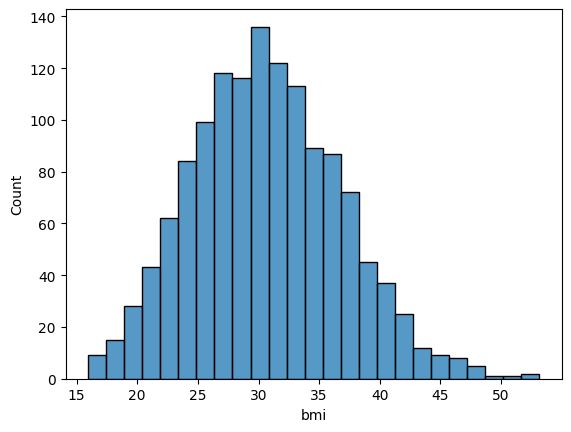

In [116]:
sb.histplot(data=dados, x="bmi")

<Axes: xlabel='bmi'>

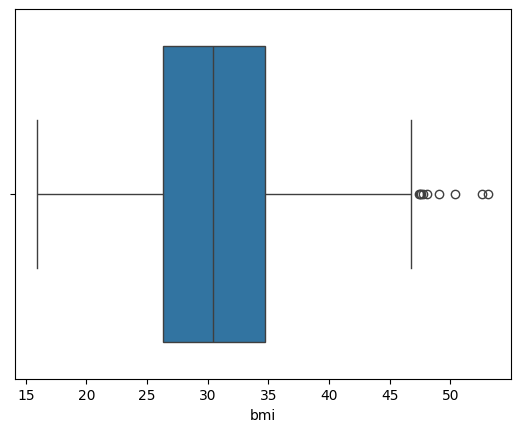

In [117]:
sb.boxplot(x=dados["bmi"])

<Axes: xlabel='smoker'>

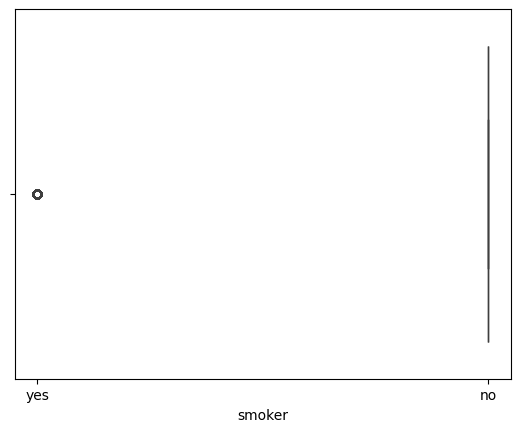

In [118]:
sb.boxplot(x=dados["smoker"])

<Axes: xlabel='smoker', ylabel='Count'>

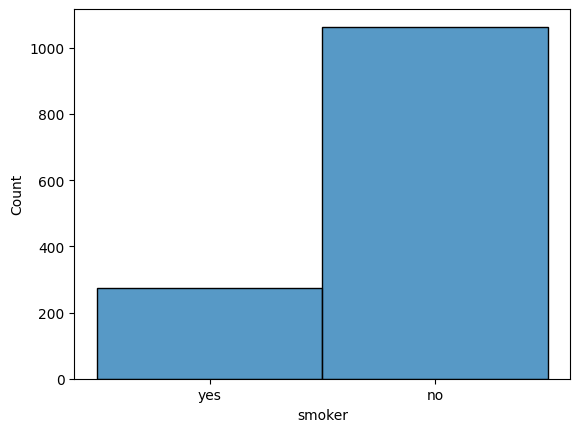

In [119]:
sb.histplot(data=dados, x="smoker")

<Axes: xlabel='charges'>

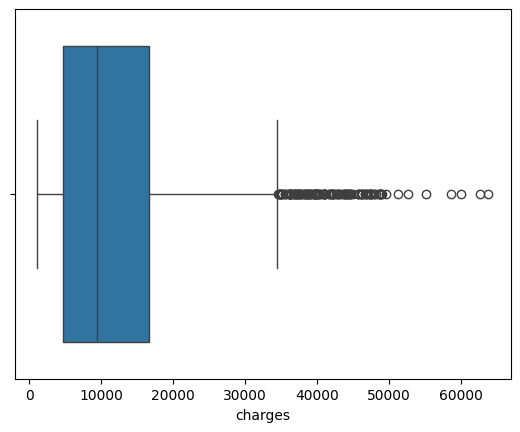

In [120]:
sb.boxplot(x=dados["charges"])

<Axes: xlabel='charges', ylabel='Count'>

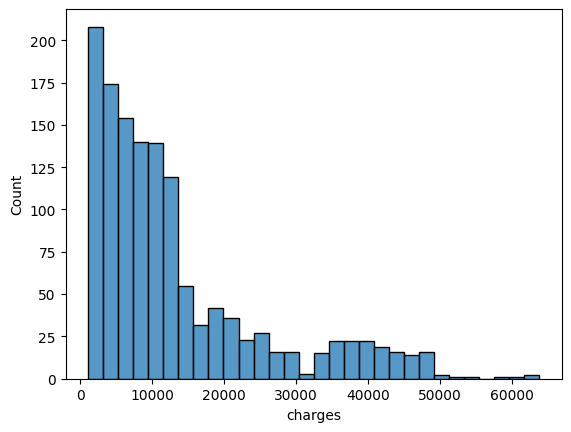

In [121]:
sb.histplot(data=dados, x="charges")

In [ ]:

import numpy as np
# Criando dataframe somente com nossas variáveis numericas
# Matriz de correlacao trabalha somente com dados numericos 
dados_numerico = dados.select_dtypes([np.number])
# Calcula a matriz de correlação
correlation_matrix = dados_numerico.corr()
correlation_matrix

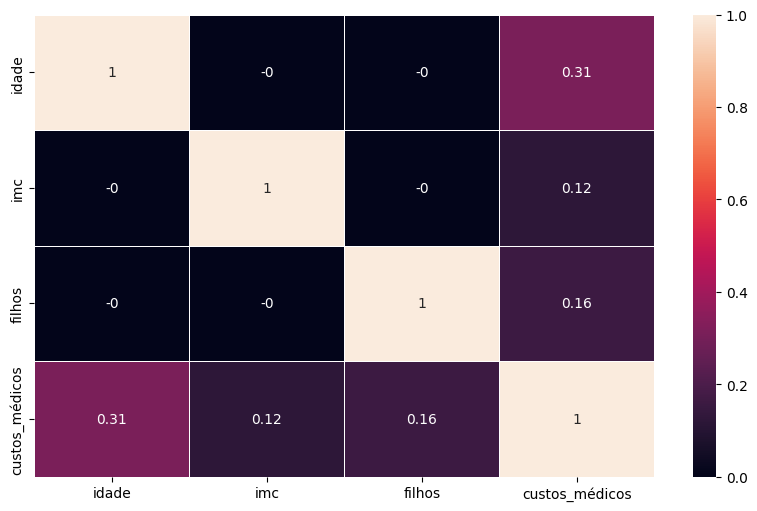

In [140]:
# # ! pip install matplotlib

import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Supondo que 'dados' seja seu DataFrame
# Filtrar colunas numéricas

numeric_dados = dados.select_dtypes('number')
# Calcular a matriz de correlação
correlation_matrix = numeric_dados.corr().round(2)
# arrendondo os valores das correlacoes
fig, ax = plt.subplots(figsize=(10, 6))
sb.heatmap(data= correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

